# Ch.5 Regression

#### 5.4 보스턴 주택 가격 예측

In [14]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from scipy import stats
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()

In [9]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
bostonDF.shape

(506, 14)

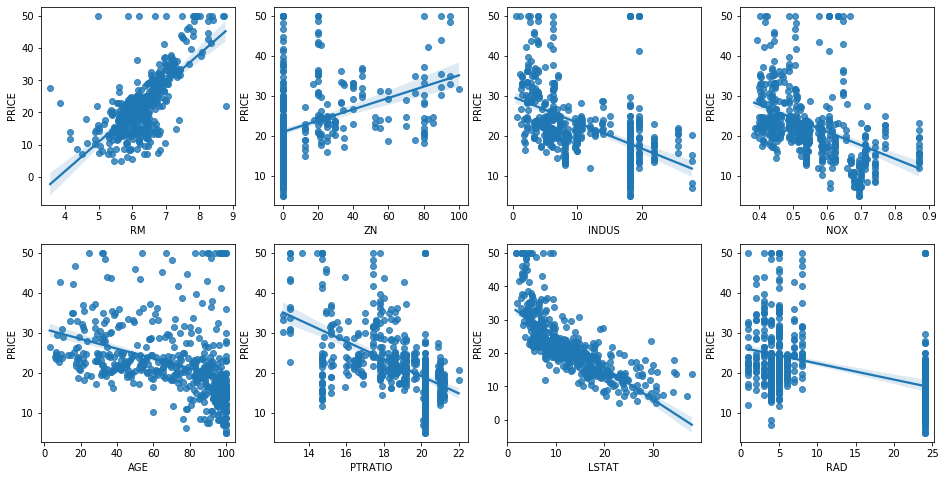

In [19]:
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

In [21]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [22]:
X = bostonDF['RM']
Y = boston.target

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 160)

- 모델 불러와 객체 생성

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
sim_lr = LinearRegression()

- 모델 학습하기

In [41]:
sim_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))

- 결과 확인하기

In [96]:
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
r2_score(y_test, y_pred)

0.5635874634171918

- 계수 w(weight), 절편 b(bias)

In [45]:
sim_lr.coef_, sim_lr.intercept_

(array([9.34529449]), -36.20415621348282)

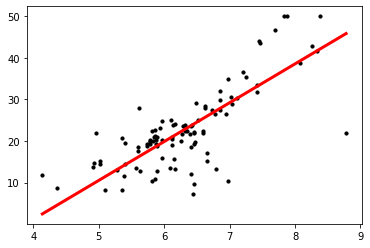

In [55]:
plt.scatter(X_test, y_test, s = 10, c = 'black')
line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1, 1))
plt.plot(line_x, line_y, c = 'red', lw = 3)

In [62]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = [4, 8]
y1 = 4 * w + b
y2 = 8 * w + b

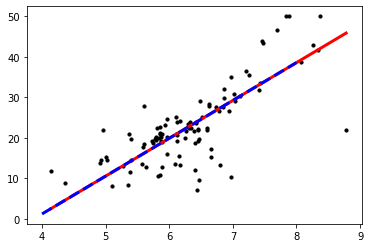

In [65]:
plt.scatter(X_test, y_test, s = 10, c = 'black')
plt.plot(line_x, line_y, 'red', lw = 3)
plt.plot(xs, [y1, y2], 'blue', lw = 3, ls = '--')

In [72]:
x = bostonDF['LSTAT']
y = boston.target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 150)

In [77]:
sim_lr.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))

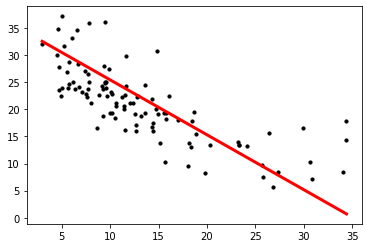

In [79]:
plt.scatter(X_test, y_test, s = 10, c = 'black')
line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1, 1))
plt.plot(line_x, line_y, c = 'red', lw = 3)

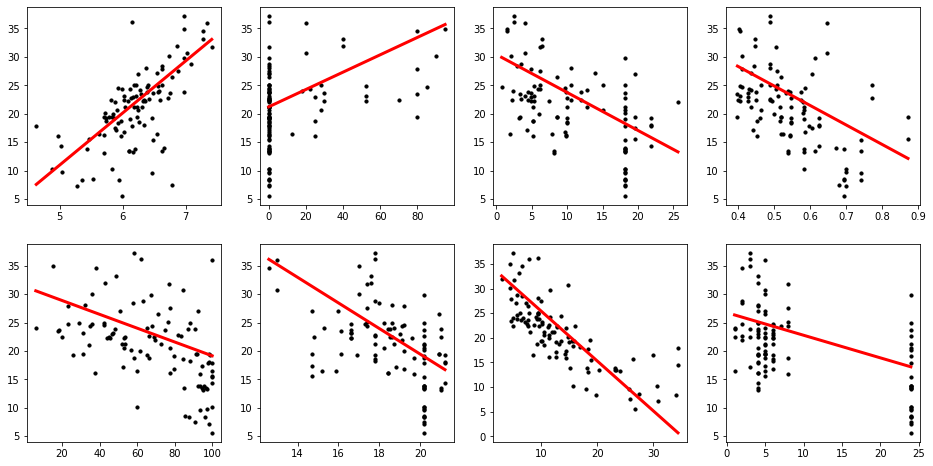

In [87]:
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    
#     모델 핏
    X = bostonDF[feature]
    Y = boston.target
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 150)
    sim_lr.fit(X_train.values.reshape(-1, 1), y_train)
    y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))
    
    row = int(i/4)
    col = i%4
    
    ax = axs[row][col]
    ax.scatter(X_test, y_test, s = 10, c = 'black')
    line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
    line_y = sim_lr.predict(line_x.reshape(-1, 1))
    ax.plot(line_x, line_y, c = 'red', lw = 3)

### Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dt_regr = DecisionTreeRegressor(max_depth=5)

In [93]:
dt_regr.fit(X_train.values.reshape(-1, 1), y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [95]:
y_pred_dt = dt_regr.predict(X_test.values.reshape(-1, 1))

In [106]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

In [107]:
rmse

6.196902920666687

### Support Vector Machine Regressor

In [90]:
from sklearn.svm import SVR

In [100]:
svm_regr = SVR()

In [101]:
svm_regr.fit(X_train.values.reshape(-1, 1), y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [103]:
y_pred_svm = svm_regr.predict(X_test.values.reshape(-1, 1))

In [108]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))

In [109]:
rmse

5.7873022983799505